In [16]:
import numpy as np
import matplotlib.pyplot as plt

from cProfile import Profile
from pstats import SortKey, Stats

# Import BeamSection module from FlightBEND
from FlightBEND.beam_section import BeamSection
%matplotlib inline


In [17]:
# Number of stringers
numberOfStringers = 0
# Trailing edge
withTE            = True

## Import mesh
if withTE:
    match numberOfStringers:
        case 8:        
            from meshes.NACA0015_WithTE_8str_1858e  import dados as data; 
        case 6:
            from meshes.NACA0015_WithTE_6str_1826e  import dados as data; 
        case 4:
            from meshes.NACA0015_WithTE_4str_1794e  import dados as data; 
        case 2:
            from meshes.NACA0015_WithTE_2str_1762e  import dados as data; 
        case 0:
            from meshes.NACA0015_WithTE_0str_1730e  import dados as data; 
        case _:
            raise Exception('Invalid number of stringers. Please select 0 to 4 stringer pairs')
else:
    match numberOfStringers:
        case 8:        
            from meshes.NACA0015_NoTE_8str_1300e  import dados as data; 
        case 6:
            from meshes.NACA0015_NoTE_6str_1268e  import dados as data; 
        case 4:
            from meshes.NACA0015_NoTE_4str_1236e  import dados as data; 
        case 2:
            from meshes.NACA0015_NoTE_2str_1204e  import dados as data; 
        case 0:
            from meshes.NACA0015_NoTE_0str_1172e  import dados as data; 
        case _:
            raise Exception('Invalid number of stringers. Please select 0 to 4 stringer pairs')

In [3]:
all_nodes = range(len(data['coordinates'])) # lista de 0 a nNos
unique_nodes = np.unique(data['elements'])

diff = np.setdiff1d(all_nodes, unique_nodes)
print('Unused nodes:')
print(diff)

Unused nodes:
[]


In [4]:
## Unpacking mesh data
# This mesh was drawn in meters, converting to mm
secNodes    = data['coordinates'] *1e3
secElems    = data['elements']

# This mesh was made with two materials, making it homogeneous
secYoung    = data['materials'][:,0]
secNu       = data['materials'][:,1]
secRho      = data['materials'][:,2]



In [20]:
with Profile() as profile:
    sec = BeamSection(intDegree=2,coordinates=secNodes,connectivity=secElems,young=secYoung,nu=secNu,rho=secRho)
    (
        Stats(profile)
        .strip_dirs()
        .sort_stats(SortKey.CUMULATIVE)
        # .sort_stats(SortKey.CALLS)
        .print_stats()
    )

Area properties integration time: 2.411 seconds
Global stiffness assembly time: 4.887 seconds
System solve time: 0.021 seconds
         5943856 function calls in 25.125 seconds

   Ordered by: cumulative time

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.053    0.053   25.125   25.125 beam_section.py:42(__init__)
        1    0.005    0.005   15.213   15.213 beam_section.py:731(__solveWarping)
     1731    0.005    0.000   11.373    0.007 _lil.py:154(__getitem__)
     1731    0.013    0.000   11.367    0.007 _index.py:29(__getitem__)
     1731   11.061    0.006   11.242    0.006 _lil.py:212(_get_arrayXarray)
        1    0.087    0.087    4.887    4.887 beam_section.py:648(__globalStiffness)
    41520    1.514    0.000    4.833    0.000 fem_geometry.py:313(getJacob)
   304508    3.844    0.000    3.844    0.000 {built-in method numpy.array}
     8650    0.069    0.000    3.504    0.000 fem_geometry.py:1068(getElemDof)
        1    0.900    0.90

In [5]:
# Instancing BeamSection object
sec = BeamSection(coordinates=secNodes,connectivity=secElems,young=secYoung,nu=secNu,rho=secRho)


Area properties integration time: 2.038 seconds
Global stiffness assembly time: 4.844 seconds
System solve time: 0.022 seconds


In [6]:
print(f"{sec.areaProperties['torsionalConstant'] :.4e}")

6.7308e+07


In [7]:
plt.close('all')

(0.0, 976.0, -74.92999999999999, 74.92999999999999)

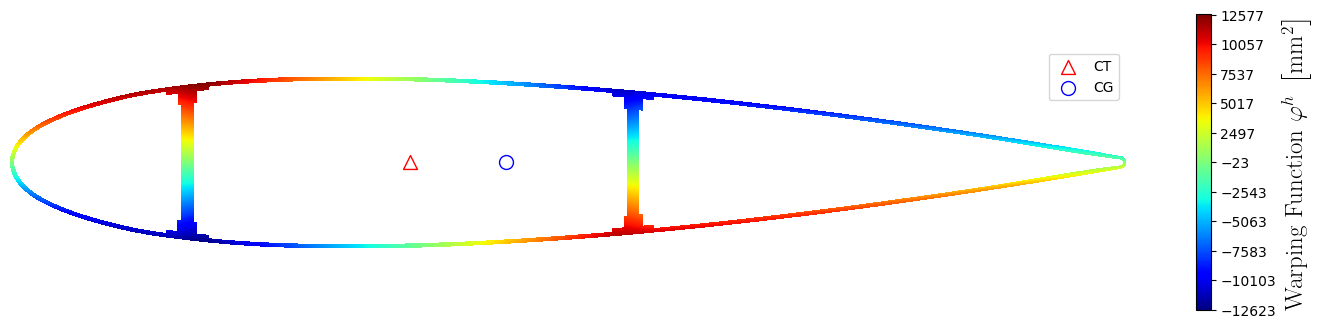

In [8]:
# Maximum and minumum displacement values from ABAQUS
vmax =  1.545e-1
vmin = -6.092e-2

# Twist rate [rad/m]
rate = None

## Warping
fig, ax = sec.plotWarping(levels=255, showMesh=False, unit='mm', 
                          figsize=(15,4),
                          cbarKwargs=dict(shrink=.8))

# Remove axis frame and reposition legend 
ax.get_legend().set_bbox_to_anchor([1,1])
ax.axis('off')



(-48.800000000000004, 1024.8, -82.42299999999999, 82.42299999999999)

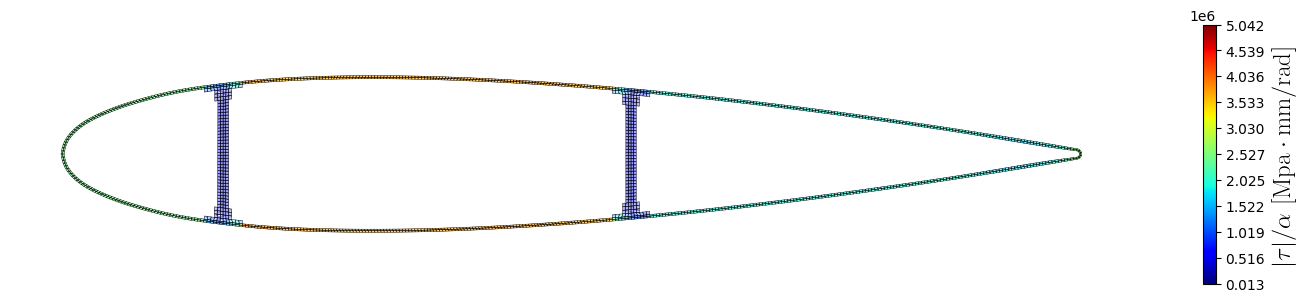

In [9]:
## Shear stresses
fig2, ax2 = sec.plotShearStresses(degree=4, 
                                  width=.2,scale=.5, headlength=5, 
                                  figsize=(15,4), cbarKwargs=dict(shrink=.7))
fig2.tight_layout()
# Remove axis frame 
ax2.axis('off')

In [10]:
# ## Shear stresses, component wise
# fig3, ax3 = sec.plotShearStresses(degree=4, mode='scalar',
#                                   figsize=(15,4),
#                                   cbarKwargs=dict(shrink=.5))
# fig3.tight_layout()
# # Remove axis frame 
# {ax.axis('off') for ax in ax3}

### Details

In [11]:
plt.close(fig2)
plt.ioff()

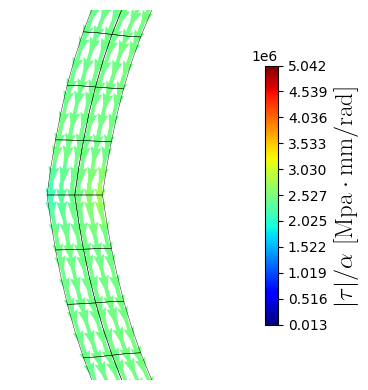

In [12]:
plt.title('Detail (a)')
ax2.set_xlim([-2,8])
ax2.set_ylim([-10,10])
plt.figure(fig2)

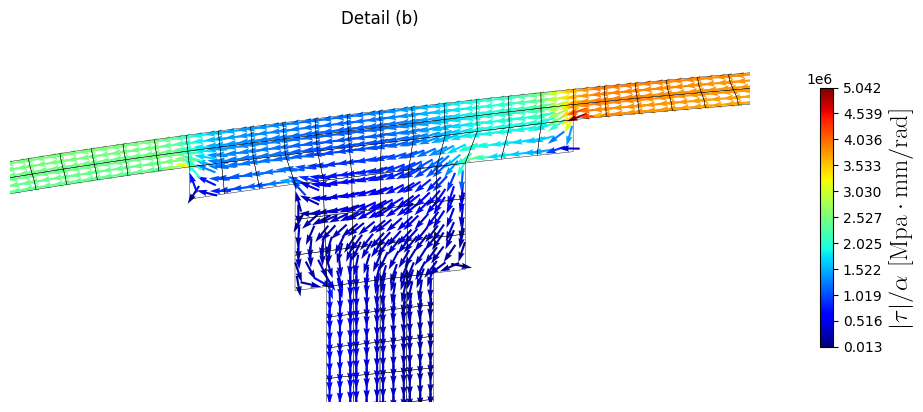

In [13]:
plt.title('Detail (b)')
ax2.set_xlim([120,190])
ax2.set_ylim([40,75])
plt.figure(fig2)

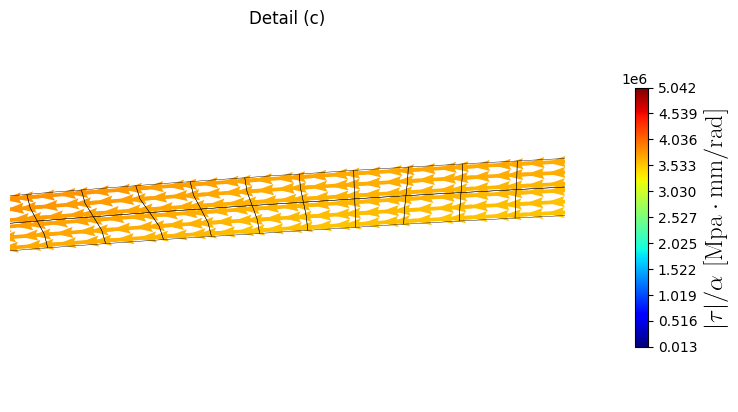

In [14]:
plt.title('Detail (c)')
ax2.set_xlim([190,220])
ax2.set_ylim([60,80])
plt.figure(fig2)

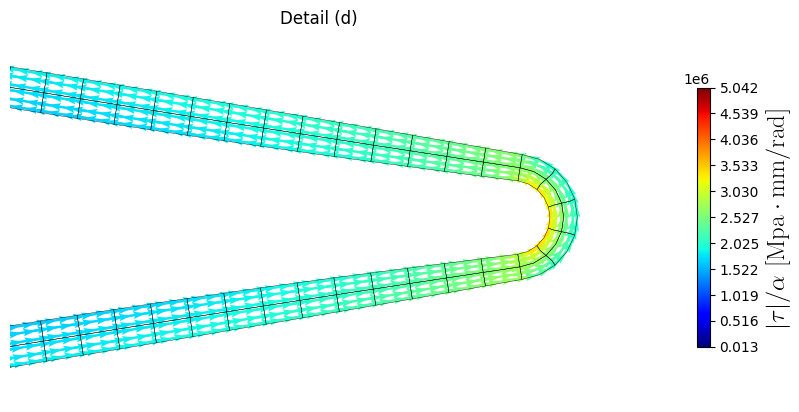

In [15]:
plt.title('Detail (d)')
ax2.set_xlim([930,980])
ax2.set_ylim([-15,15])
plt.figure(fig2)